<a href="https://colab.research.google.com/github/Mahi-Parate/Task_04_DataAnalytic/blob/main/predicting_customer_churn_inTelecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import joblib


In [6]:
import pandas as pd

file_path = '/content/Telco_customer_churn1.csv'
df = pd.read_csv(file_path)

**Explore the data**

In [7]:
print(df.shape)



(4209, 33)


In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4209 non-null   object 
 1   Count              4209 non-null   int64  
 2   Country            4209 non-null   object 
 3   State              4209 non-null   object 
 4   City               4208 non-null   object 
 5   Zip Code           4208 non-null   float64
 6   Lat Long           4208 non-null   object 
 7   Latitude           4208 non-null   float64
 8   Longitude          4208 non-null   float64
 9   Gender             4208 non-null   object 
 10  Senior Citizen     4208 non-null   object 
 11  Partner            4208 non-null   object 
 12  Dependents         4208 non-null   object 
 13  Tenure Months      4208 non-null   float64
 14  Phone Service      4208 non-null   object 
 15  Multiple Lines     4208 non-null   object 
 16  Internet Service   4208 

In [9]:
print(df.head())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles   90003.0   
1  9237-HQITU      1  United States  California  Los Angeles   90005.0   
2  9305-CDSKC      1  United States  California  Los Angeles   90006.0   
3  7892-POOKP      1  United States  California  Los Angeles   90010.0   
4  0280-XJGEX      1  United States  California  Los Angeles   90015.0   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

**Drop irrelevant columns**

In [10]:
df = df.drop(columns=['CustomerID', 'Count',  'State', 'City', 'Zip Code', 'Latitude', 'Longitude'])

**Handle missing values**

In [11]:
df = df.dropna()

**Encoding using labelencoder**

In [12]:
le = LabelEncoder()
binary_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn Label']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

**Encode multi-class categorical features using OneHotEncoder**

In [13]:
multi_cols = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection',
              'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method', 'Churn Reason']
df = pd.get_dummies(df, columns=multi_cols)

**Scale numeric features**

In [14]:
scaler = StandardScaler()
num_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']
df[num_cols] = scaler.fit_transform(df[num_cols])

**Split data into features and target**

In [15]:
X = df.drop(['Churn Label'], axis=1)
y = df['Churn Label']

**Split into train and test sets**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("Non-numeric columns:", X_train.select_dtypes(include=['object']).columns)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print("Model trained successfully!")


Non-numeric columns: Index([], dtype='object')
Model trained successfully!


**Train RandomForestClassifier**

In [18]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Predictions**

In [19]:
y_pred = rf_model.predict(X_test)

**Evaluate the model**

In [20]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 1.0
ROC AUC Score: nan

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       374

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


**confusion matrix**

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


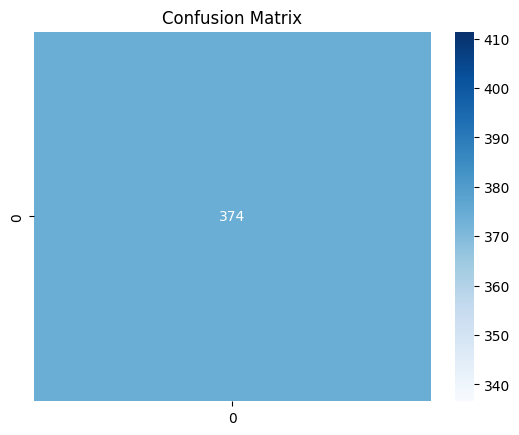

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [22]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

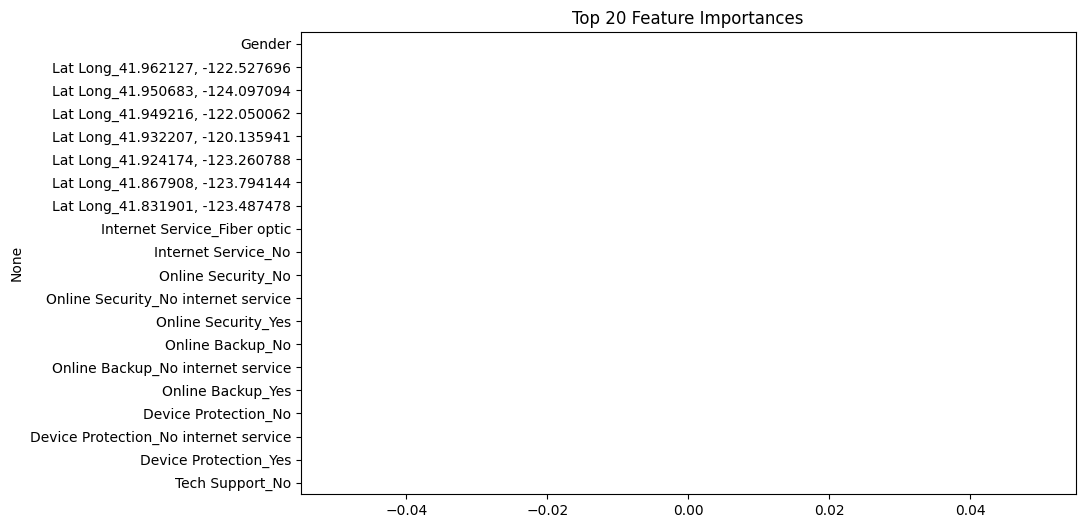

In [27]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
features = X_train.columns
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:20], y=features[indices][:20])
plt.title('Top 20 Feature Importances')
plt.show()


In [40]:
joblib.dump(rf_model, 'rf_churn_model.pkl')
print("Model saved as 'rf_churn_model.pkl'")

Model saved as 'rf_churn_model.pkl'
